<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week9/day1/ex_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [17]:
data = pd.read_csv('train.csv')


In [16]:
print(data.shape)
data.head()

data.info()

data.describe()

(9800, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dt

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [27]:
data


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [20]:
data_type_order_date = data['Order Date'].dtype
data_type_order_date

dtype('O')

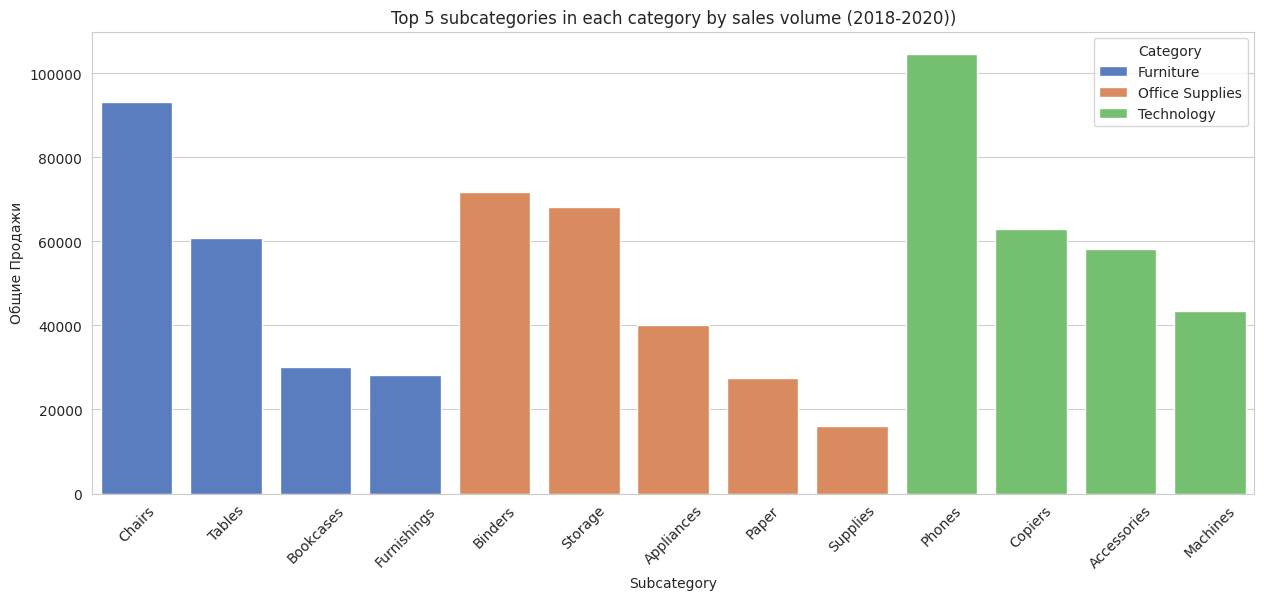

In [31]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
filtered_data_2018_2020 = data[(data['Order Date'].dt.year >= 2018) & (data['Order Date'].dt.year <= 2020)]
grouped_sales_data_2018_2020 = filtered_data_2018_2020.groupby(['Category', 'Sub-Category']).agg(
    Total_Sales=('Sales', 'sum')
).reset_index()

sorted_sales_data_2018_2020 = grouped_sales_data_2018_2020.sort_values(['Category', 'Total_Sales'], ascending=[True, False])

top_5_subcategories_sales_2018_2020 = sorted_sales_data_2018_2020.groupby('Category').head(5)

plt.figure(figsize=(15, 6))
sns.barplot(x='Sub-Category', y='Total_Sales', hue='Category', data=top_5_subcategories_sales_2018_2020, palette='muted')
plt.title('Top 5 subcategories in each category by sales volume (2018-2020))')
plt.xlabel('Subcategory')
plt.ylabel('Общие Продажи')
plt.xticks(rotation=45)
plt.show()


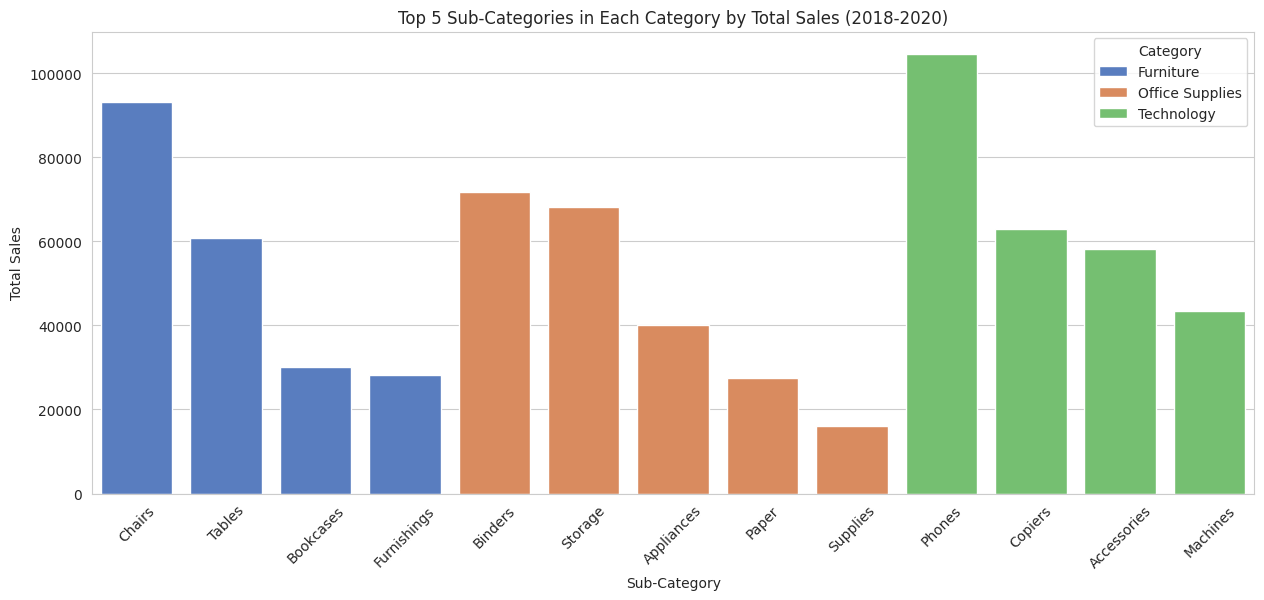

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))
sns.barplot(x='Sub-Category', y='Total_Sales', hue='Category', data=top_5_subcategories_sales_2018_2020, palette='muted')
plt.title('Top 5 Sub-Categories in Each Category by Total Sales (2018-2020)')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-35-d9368d69a28d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer ID', y='CLV', data=top_customers_by_clv, palette='viridis')


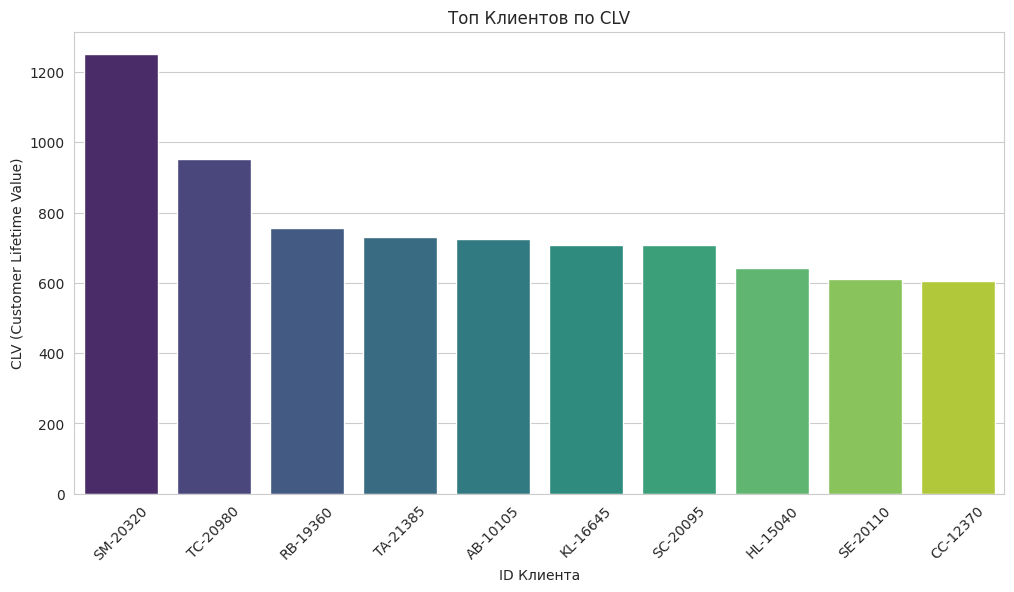

,Customer ID,Purchase_Frequency,Average_Purchase_Value,Total_Sales,CLV
0,AA-10315,5,505.778182,5563.560,278.17800
1,AA-10375,9,70.426000,1056.390,52.81950
2,AA-10480,4,149.209333,1790.512,89.52560
3,AA-10645,6,282.607500,5086.935,254.34675
4,AB-10015,3,147.692667,886.156,44.30780


In [35]:
customer_data = data.groupby('Customer ID').agg(
    Purchase_Frequency=('Order ID', 'nunique'),
    Average_Purchase_Value=('Sales', 'mean'),
    Total_Sales=('Sales', 'sum')
).reset_index()

margin_rate = 0.05
customer_data['CLV'] = customer_data['Total_Sales'] * margin_rate

top_customers_by_clv = customer_data.sort_values('CLV', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='CLV', data=top_customers_by_clv, palette='viridis')
plt.title('Топ Клиентов по CLV')
plt.xlabel('ID Клиента')
plt.ylabel('CLV (Customer Lifetime Value)')
plt.xticks(rotation=45)
plt.show()

customer_data.head()
